# Figure 5d. Standardized effect sizes of the MaxVCP-xQTL and an analogous score based on the HyPrColoc method. 

Standardized effect sizes of the MaxVCP-xQTL and an analogous score based on the HyPrColoc method in a joint model involving other 97 baseline-LD v2.2 annotations. All results are meta-analyzed across 57 complex traits as well as subsets of 18 brain-related and 22 blood-related traits following from S-LDSC recommendations. The asterisks indicate statistical significance (Bonferroni adjusted p-value<0.05). Error bars indicate 95% confidence intervals.

In [5]:
library(ggplot2)
library(ggforce)
library(ggsci)
data <- readRDS("data/Figure_5d.rds")
sd <- 1.96
# color <- c(pal_npg()(10), pal_d3()(10))
color <- c("#a8952a", "#66c2a5")
ylim_values <- list(
  "marginal tau*" = c(-0.1, 1),
  "Enrichment" = c(-1, 22),
  "joint tau*" = c(-0.1, 1)
)

create_plot <- function(context){
  if (context == "marginal tau*") {
    y.show <- expression(paste("Marginal ", tau, "*"))
  } else if (context == "joint tau*") {
    y.show <- expression(paste("Joint ", tau, "*"))
  } else {
    y.show = context
  }
  p <- ggplot(data[data$Context == context, ], aes(x = Annotation, y = Value, fill = Annotation)) +
    geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
    geom_errorbar(aes(ymin = Value - sd*Error, ymax = Value + sd*Error), width = 0.2, position = position_dodge(0.7)) +
    facet_wrap(~ Disease) +
    scale_fill_manual(values = c("MaxScore-H (0.13%)" = color[1],
                                 "MaxVCP-xQTL (0.14%)" = color[2])) +
    theme_minimal(base_size = 15) +
    labs(
      title = "",
      x = "",
      y = y.show,
      fill = "Annotation"
    ) +
    ylim(ylim_values[[context]])
  if (context == "marginal tau*") {
    p <- p + geom_text(data = subset(data, Context == "marginal tau*" & (P <= 0.05/6) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  } else if (context == "joint tau*") {
    p <- p + geom_text(data = subset(data, Context == "joint tau*" & (P <= 0.05/6) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  } else {
    p <- p + geom_hline(yintercept = 1, linetype = "dashed", color = "grey20", linewidth = 0.7)  + 
      geom_text(data = subset(data, Context == "Enrichment" & (P <= 0.05/6) & Value > 0), aes(label = "*", y = Value + sd * Error + 0.03), vjust = 0, color = "#F94144", size = 7)
  }
  if (context == "joint tau*"){
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.4), "cm"),
      strip.text.x = element_blank(),
      axis.text.x = element_blank(),
      axis.title.y = element_text(margin = margin(r = -4)),
      legend.position = "inside",
      legend.justification = c(0, 1),
      legend.title = element_text(size = 0),
      legend.text = element_text(size = 10),
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  } else if (context == "Enrichment"){
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_text(size = 15),
      axis.text.x = element_blank(),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  } else {
    p <- p + theme(
      plot.margin = unit(c(-0.5, 0.5, -0.5, 0.5), "cm"),
      strip.text.x = element_blank(),
      axis.text.x = element_blank(),
      axis.title.y = element_text(margin = margin(r = -2)),
      legend.position = "none",
      panel.border = element_rect(color = "grey20", fill = NA, linewidth = 1.5)
    )
  }
  return(p)
}
plot_joint_tau <- create_plot("joint tau*")


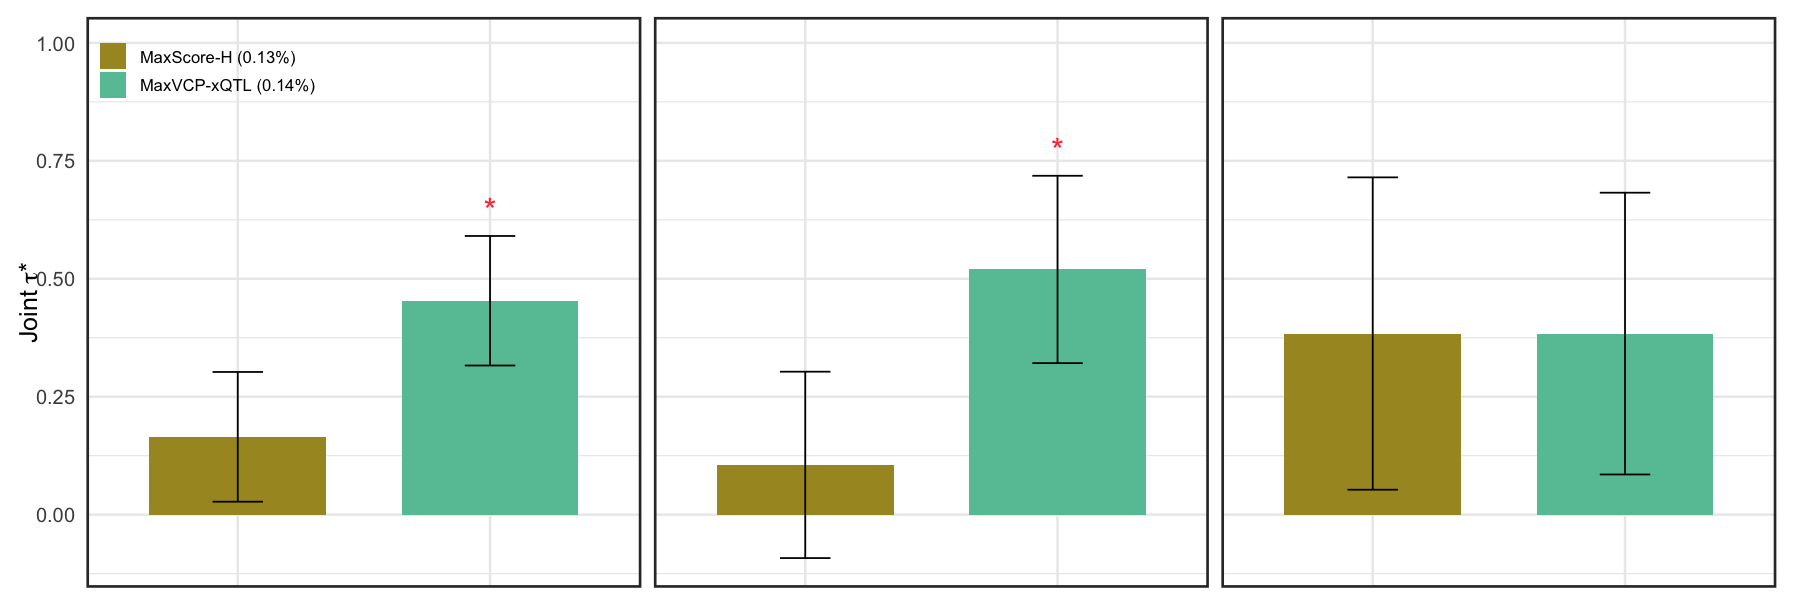

In [6]:
options(repr.plot.width = 15, repr.plot.height = 5)
plot_joint_tau